# PHM Data Challenge 2014

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from collections import Counter

## Data Loading

In [3]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A060723,0,R193,P184448,0.0
4,A174613,0,R707,P097048,1.0


In [4]:
usage = pd.read_csv("../data/Train - Usage.csv")
usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [5]:
failures = pd.read_csv("../data/Train - Failures.csv")
failures.head()

,Asset,Time
0,A403193,137
1,A403193,146
2,A403193,155
3,A403193,229
4,A403193,420


## Data Analysis

In [6]:
consumption.describe()

,Time,Quantity
count,270830.000000,270830.000000
mean,378.872691,3.565059
std,212.522371,20.420610
min,0.000000,-15.000000
25%,195.000000,1.000000
50%,388.000000,1.000000
75%,567.000000,2.000000
max,730.000000,3000.000000


In [7]:
usage.describe()

,Time,Use
count,22828.000000,22828.000000
mean,374.998730,30273.978469
std,211.670945,2528.890997
min,0.000000,25740.475447
25%,194.000000,28471.064870
50%,377.000000,30516.599911
75%,562.000000,31878.612314
max,730.000000,187239.128532


In [8]:
failures.describe()

,Time
count,9199.000000
mean,379.170345
std,210.243071
min,0.000000
25%,199.000000
50%,389.000000
75%,563.000000
max,730.000000


In [9]:
c = Counter(consumption.Reason)
reason_count = c.most_common()
reason_count

[('R707', 136714),
 ('R565', 58284),
 ('R193', 39668),
 ('R417', 12960),
 ('R446', 11090),
 ('R364', 7056),
 ('R119', 2143),
 ('R783', 1858),
 ('R044', 393),
 ('R606', 349),
 ('R575', 262),
 ('R064', 42),
 ('R396', 10),
 ('R782', 1)]

In [10]:
c = Counter(failures.Asset)
failures_count = c.most_common()
failures_count

[('A624962', 19),
 ('A344737', 19),
 ('A546754', 17),
 ('A396638', 17),
 ('A613089', 17),
 ('A196573', 17),
 ('A288494', 16),
 ('A122955', 16),
 ('A130356', 16),
 ('A968343', 16),
 ('A838297', 16),
 ('A073164', 16),
 ('A067512', 16),
 ('A824908', 15),
 ('A748065', 15),
 ('A354676', 15),
 ('A599433', 15),
 ('A689043', 15),
 ('A278781', 15),
 ('A943170', 14),
 ('A181324', 14),
 ('A175822', 14),
 ('A203444', 14),
 ('A402608', 14),
 ('A744243', 14),
 ('A317141', 14),
 ('A446813', 14),
 ('A592525', 14),
 ('A547881', 14),
 ('A550035', 14),
 ('A024432', 14),
 ('A621532', 14),
 ('A531932', 13),
 ('A399220', 13),
 ('A367237', 13),
 ('A333832', 13),
 ('A499073', 13),
 ('A926119', 13),
 ('A283388', 13),
 ('A250298', 13),
 ('A152340', 13),
 ('A733174', 13),
 ('A496983', 13),
 ('A616364', 13),
 ('A429540', 13),
 ('A519059', 13),
 ('A355669', 13),
 ('A558858', 12),
 ('A920271', 12),
 ('A439865', 12),
 ('A457170', 12),
 ('A010961', 12),
 ('A989821', 12),
 ('A423193', 12),
 ('A210011', 12),
 ('A481735

## Data Preprocessing

In [11]:
indexes = consumption.query("Quantity <= 0").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(inplace=True)

In [12]:
consumption.Quantity.describe()

count    266137.000000
mean          3.628079
std          20.594277
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        3000.000000
Name: Quantity, dtype: float64

## Article plots reproduction

In [13]:
assets = consumption.Asset.unique()
assets

array(['A311482', 'A174613', 'A555548', ..., 'A855324', 'A539580',
       'A906011'], dtype=object)

100%|██████████| 1913/1913 [00:04<00:00, 444.99it/s]


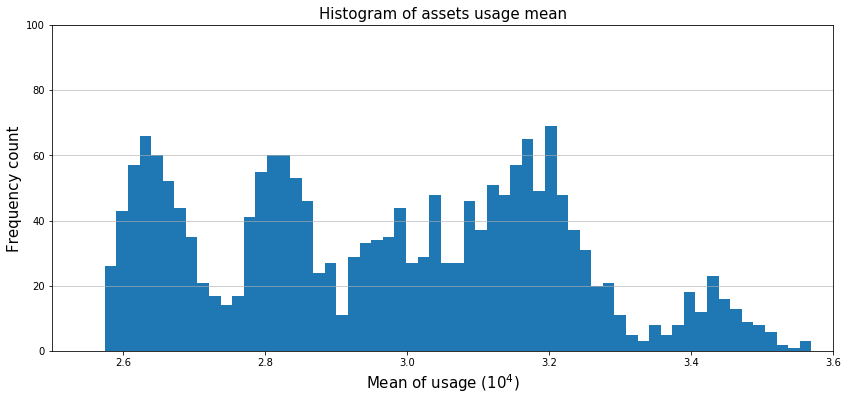

In [14]:
mean_usages = []
std_usages = []
for asset in tqdm(assets):
    asset_usages = usage.query("Asset == @asset").Use.to_list()
    if len(asset_usages) > 0:
        mean_usages.append(np.mean(asset_usages))
        std_usages.append(np.std(asset_usages))

mean_usages = list(map(lambda x: x / 1e4, mean_usages))

plt.figure(figsize=(14, 6))
plt.hist(mean_usages, bins=500)
plt.grid(axis="y", alpha=0.75)
plt.xlim(2.5, 3.6)
plt.ylim(0, 100)
plt.xlabel("Mean of usage $(10^4)$", fontsize=15)
plt.ylabel("Frequency count", fontsize=15)
plt.title("Histogram of assets usage mean", fontsize=15)
plt.show()

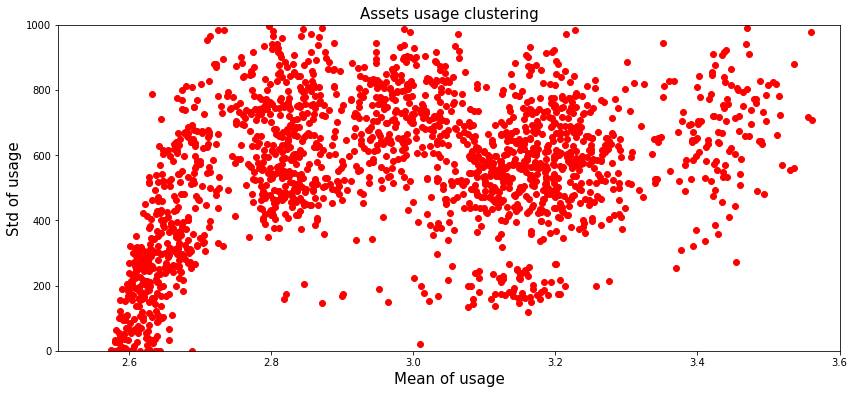

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(mean_usages, std_usages, "ro")
plt.xlim(2.5, 3.6)
plt.ylim(0, 1000)
plt.xlabel("Mean of usage", fontsize=15)
plt.ylabel("Std of usage", fontsize=15)
plt.title("Assets usage clustering", fontsize=15)
plt.show()

100%|██████████| 1913/1913 [00:04<00:00, 418.06it/s]


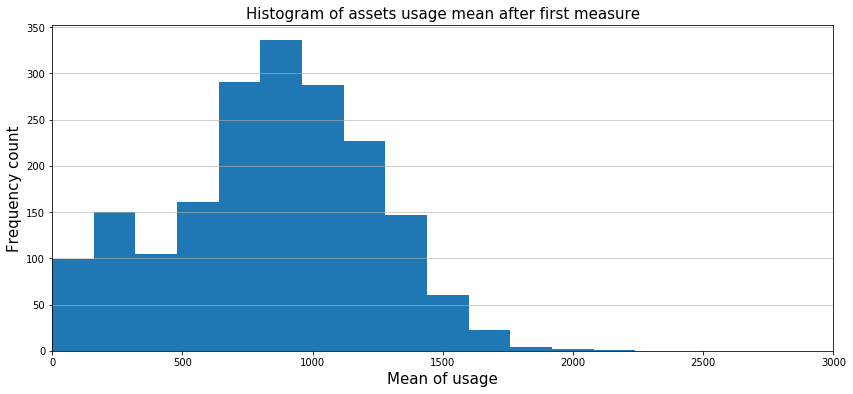

In [16]:
mean_usages = []
std_usages = []
for asset in tqdm(assets):
    asset_usages = usage.query("Asset == @asset").Use.to_list()
    if len(asset_usages) > 0:
        mean_usages.append(np.mean(asset_usages) - asset_usages[0])
        std_usages.append(np.std(asset_usages))

plt.figure(figsize=(14, 6))
plt.hist(mean_usages, bins=500)
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 3000)
plt.xlabel("Mean of usage", fontsize=15)
plt.ylabel("Frequency count", fontsize=15)
plt.title("Histogram of assets usage mean after first measure", fontsize=15)
plt.show()

## Training Data construction

In [17]:
train_df = consumption.copy()
train_df.drop("index", axis=1, inplace=True)

In [18]:
train_df.shape

(266137, 5)

In [19]:
train_df["Failure"] = [False] * train_df.shape[0]
train_df["Time_failure"] = [0] * train_df.shape[0]
train_df["Time_diff"] = [0] * train_df.shape[0]
train_df["Usage_on_failure"] = [0] * train_df.shape[0]

In [20]:
train_df.head()

,Asset,Time,Reason,Part,Quantity,Failure,Time_failure,Time_diff,Usage_on_failure
0,A311482,0,R417,P361646,1.0,False,0,0,0
1,A174613,0,R707,P991287,1.0,False,0,0,0
2,A174613,0,R707,P169319,1.0,False,0,0,0
3,A174613,0,R707,P097048,1.0,False,0,0,0
4,A174613,0,R707,P169319,1.0,False,0,0,0


In [21]:
# for fail_asset, fail_time in tqdm(list(failures.itertuples(index=False, name=None))):
#     possible_cons = consumption.query("Time <= @fail_time and Asset == @fail_asset")

#     usage_next = usage.query("Time >= @fail_time and Asset == @fail_asset").head(1)
#     usage_prev = usage.query("Time <= @fail_time and Asset == @fail_asset").tail(1)

#     usage_failure_value = 0
#     if len(usage_next) > 0 and len(usage_prev) > 0:
#         usage_prev_time = usage_prev.iloc[0, 1]
#         usage_prev_value = usage_prev.iloc[0, 2]
#         usage_next_time = usage_next.iloc[0, 1]
#         usage_next_value = usage_next.iloc[0, 2]

#         if usage_next_time - usage_prev_time > 0:
#             usage_failure_value = fail_time - usage_prev_time
#             usage_failure_value /= usage_next_time - usage_prev_time
#             usage_failure_value *= usage_next_value - usage_prev_value
#             usage_failure_value += usage_prev_value
#         else:
#             usage_failure_value = usage_next_value

#     inserted_parts = []
#     for index, cons_part in possible_cons[::-1].iterrows():
#         if cons_part.Part not in inserted_parts:
#             train_df.loc[index, "Failure"] = True
#             train_df.loc[index, "Time_failure"] = fail_time
#             train_df.loc[index, "Time_diff"] = (
#                 fail_time - consumption.loc[index, "Time"]
#             )
#             train_df.loc[index, "Usage_on_failure"] = usage_failure_value
#             inserted_parts.append(cons_part.Part)

train_df = pd.read_csv("../data/train_features.csv")

In [22]:
train_df.query("Failure==True")

,Asset,Time,Reason,Part,Quantity,Failure,Time_failure,Time_diff,Usage_on_failure
0,A311482,0.00000,R417,P361646,1.0,True,0.445205,0.445205,29066.424327
7,A174613,0.00000,R707,P097048,1.0,True,0.124658,0.124658,31190.029929
9,A174613,0.00000,R707,P991287,1.0,True,0.784932,0.784932,32660.951097
10,A174613,0.00000,R707,P566684,1.0,True,0.124658,0.124658,31190.029929
11,A555548,0.00000,R565,P374736,1.0,True,0.698630,0.698630,31504.212968
...,...,...,...,...,...,...,...,...,...
265305,A049130,0.99863,R364,P459171,8.0,True,1.000000,0.001370,0.000000
265306,A049130,0.99863,R364,P322912,2.0,True,1.000000,0.001370,0.000000
265307,A049130,0.99863,R364,P999688,8.0,True,1.000000,0.001370,0.000000
265308,A049130,0.99863,R364,P843990,2.0,True,1.000000,0.001370,0.000000


In [23]:
train_df.to_csv("../data/train_features.csv", index=False)

This train set above does not really express others examples by considering some negative failures instances. So, I'll do this on Usage_on_failure column, by just measuring the usage on the Time column.

In [24]:
# train_df.drop(["Time_failure", "Time_diff", "Usage_on_failure"], axis=1, inplace=True)

# for index, row in tqdm(train_df[["Asset", "Time"]].iterrows()):
#     time = row.Time
#     asset = row.Asset
#     usage_next = usage.query("Time >= @time and Asset == @asset").head(1)
#     usage_prev = usage.query("Time <= @time and Asset == @asset").tail(1)

#     usage_value = 0
#     if len(usage_next) > 0 and len(usage_prev) > 0:
#         usage_prev_time = usage_prev.iloc[0, 1]
#         usage_prev_value = usage_prev.iloc[0, 2]
#         usage_next_time = usage_next.iloc[0, 1]
#         usage_next_value = usage_next.iloc[0, 2]

#         if usage_next_time - usage_prev_time > 0:
#             usage_value = row.Time - usage_prev_time
#             usage_value /= usage_next_time - usage_prev_time
#             usage_value *= usage_next_value - usage_prev_value
#             usage_value += usage_prev_value
#         else:
#             usage_value = usage_next_value

#     train_df.loc[index, "Usage_on_time"] = usage_value

train_df = pd.read_csv("../data/train_features_usage.csv")

In [25]:
train_df.to_csv("../data/train_features_usage.csv", index=False)